Most of the content presented in this notebook is inspired by the following content.

[Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)

[Python Pandas Tutorial (Part 10): Working with Dates and Time Series Data](https://www.youtube.com/watch?v=UFuo7EHI8zc&ab_channel=CoreySchafer)

__Agenda__

- Introduction to modules and libraries to handle time and dates in Python

- Introduction to tools available in Pandas library to work with time and dates.

# Libraries to work with Time and Dates in Python

## Datetime Module

In [7]:
## import datetime module

from datetime import datetime
# import datetime


What does it mean to import datetime from datetime? 

https://github.com/python/cpython/blob/3.10/Lib/datetime.py


In [16]:
## now we can create a datetime object

d = datetime(year = 2021, month = 10, day = 28)
d - datetime(year = 2021, month = 11, day = 28)
# d

datetime.timedelta(days=-31)

In [17]:
'2021-10-28'

'2021-10-28'

To check other arguments: https://docs.python.org/3/library/datetime.html#datetime.datetime

[Also we might want to talk about `aware` and `naive` object categories](https://docs.python.org/3/library/datetime.html#aware-and-naive-objects)

## Dateutil Library

In [18]:
## we could also use dateutil library to parse time and date
## note that dateutil is a third-party library and needs to be installed first.

## let's import parser from dateutil

from dateutil import parser


[Dateutil - Pypi](https://pypi.org/project/python-dateutil/)

In [25]:
## parser allow us to convert strings to datetime.datetime objects

## parser has a parse method to parse strings

parser.parse('August  4th 2021')

datetime.datetime(2021, 8, 4, 0, 0)

Note that the result is `datetime` object.

In [29]:
## note that this is pretty robust

parser.parse('4th of July 2021')

parser.parse('2021, July 4')

parser.parse('2021/07/04')

parser.parse('28th Oct. 2021')

datetime.datetime(2021, 10, 28, 0, 0)

__Working with `datetime` object__


In [30]:
## let's create a datetime object let's say my birthday 03-15-1982

my_birthday = datetime(year = 1982, month= 3, day = 15)
my_birthday

datetime.datetime(1982, 3, 15, 0, 0)

In [31]:
## we can check the day of the week

my_birthday.strftime('%A')

'Monday'

In [34]:
## note that using .strftime method we can convert the time into any string format.

# my_birthday.strftime('(%a)-%d-%B-%Y')
my_birthday.strftime('%B %d \'%y')

"March 15 '82"

[Reference to `strfformat` directives](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [35]:
my_birthday.strftime('%a')

'Mon'

# Numpy `datetime64` type

Why another data type?: Efficient storage and vectorized operations

In [36]:
import numpy as np

In [46]:
## note that in the case of working with a lot dates and time 
## this is the compact way to store data
date = np.array(['2021-10-28'], dtype = 'datetime64')
## use np.array with dtype argument to create today as np.datetime64 object

date
# date[0].astype(object).year


array(['2021-10-28'], dtype='datetime64[D]')

[Numpy - Datetime Documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html)

In [61]:
## note that we can easily apply vectorized operations

date + np.arange(12)

array(['2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31',
       '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
       '2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08'],
      dtype='datetime64[D]')

Note that numpy automatically choosed 'D' as the unit.

In [64]:
date = np.array(['2021-10-28'], dtype = 'datetime64[s]')
date

date + np.arange(12)

array(['2021-10-28T00:00:00', '2021-10-28T00:00:01',
       '2021-10-28T00:00:02', '2021-10-28T00:00:03',
       '2021-10-28T00:00:04', '2021-10-28T00:00:05',
       '2021-10-28T00:00:06', '2021-10-28T00:00:07',
       '2021-10-28T00:00:08', '2021-10-28T00:00:09',
       '2021-10-28T00:00:10', '2021-10-28T00:00:11'],
      dtype='datetime64[s]')

[All available datetime-units](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-units)

## Date and Times in Pandas

In [65]:
## let's import pandas
import pandas as pd

In [66]:
## the most basic data structure that pandas using is Timestamp
pd.Timestamp(year=2021, month=11, day=8)


Timestamp('2021-11-08 00:00:00')

In [67]:
## to create it we can use pd.to_datetime
pd.to_datetime('Nov 3 2021')

Timestamp('2021-11-03 00:00:00')

In [71]:
t = pd.to_datetime('Nov 3 2021')

# dir(t)

[pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

[Pandas Timestamp Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html)

In [ ]:
## note that pandas uses both datetime module and numpy.datetime64 data dtype
## so we can use some of the methods used in these modules. 

In [72]:
t.day_name()

'Wednesday'

In [74]:
t.month_name()

'November'

In [75]:
## there are also some additional methods that are very hadny when you analyze data.
# help(t)
# dir(t)
t.to_datetime64()

numpy.datetime64('2021-11-03T00:00:00.000000000')

In [76]:
## let's consider the following example

data_url ='https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ETH-1.csv'
df = pd.read_csv(data_url)

[What is Ethereum](https://ethereum.org/en/eth/)

In [77]:
## check the head

df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [78]:
df.dtypes

Date       object
Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [79]:
## note that in this case 
## it is not straightforward to convert strings to datetime

## let's try pd.to_datetime
pd.to_datetime(df.Date)

ParserError: Unknown string format: 2020-03-13 08-PM

In [82]:
# parser.parse('2020-03-13 08-PM')

In [83]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [84]:
## We can use the format parameter to give the format of the string

pd.to_datetime(df.Date, format = '%Y-%m-%d %I-%p')

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

[pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

[strftime - strptime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [85]:
## we could also directly load the data and parse the date as datetime

## for some cases it is very easy to do!
## use parse_dates and infer_datetime_format in pd.read_csv
df1 = pd.read_csv(data_url , parse_dates= ['Date'],infer_datetime_format= True)

## but this example is not one of those!
df1.dtypes

Date       object
Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [86]:
df1.Date[0]

'2020-03-13 08-PM'

In [ ]:
## in this case we need to pass a parser to date_parser argument

## define my_time_parser
## this takes a string and return pd.to_datetime 
def my_time_parser(date):
    return

## or we could use datetime.strptime mehtod

## again use read_csv but this time pass my_time_parser to date_parser argument



In [87]:
## in this case we need to pass a parser to date_parser argument
def my_time_parser(date):
    return pd.to_datetime(date, format =  '%Y-%m-%d %I-%p' ) ## or we could use datetime.strptime mehtod

df1 = pd.read_csv(data_url, 
                  parse_dates= ['Date'], 
                  date_parser = my_time_parser)

df1.Date[0]

Timestamp('2020-03-13 20:00:00')

In [89]:
## note that we could directly pass a lambda function too.

df1 = pd.read_csv(data_url, 
                  parse_dates= ['Date'], 
                  date_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %I-%p')
#                   date_parser = lambda x: pd.to_datetime(x, format =  '%Y-%m-%d %I-%p' )
                 )

df1.Date

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [90]:
## note that each entry is an timestamp

df1.Date[0]

Timestamp('2020-03-13 20:00:00')

In [92]:
## so we can use the timestamp methods

df1.Date[0].week

11

In [101]:
## but if we try to use these methods on all of the series this might not work

df1.Date.day_name()

AttributeError: 'Series' object has no attribute 'day_name'

In [100]:
## Instead we should use .dt class to be able to access datetime methods.

df1.Date.dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [104]:
## check min of date

df1.Date.min()

Timestamp('2017-07-01 11:00:00')

In [105]:
## check max of date

df1.Date.max()

Timestamp('2020-03-13 20:00:00')

In [108]:
## note that the result is timedelta type

dt = df1.Date.max() - df1.Date.min()
# dir(dt)
dt

Timedelta('986 days 09:00:00')

In [113]:
dt.days

986


__TimeDeltas__

In [119]:
## note that we can still use vectorized operations

today = datetime.now()
# today
today + pd.to_timedelta(np.arange(10), unit='D')

DatetimeIndex(['2022-04-14 19:57:41.718547', '2022-04-15 19:57:41.718547',
               '2022-04-16 19:57:41.718547', '2022-04-17 19:57:41.718547',
               '2022-04-18 19:57:41.718547', '2022-04-19 19:57:41.718547',
               '2022-04-20 19:57:41.718547', '2022-04-21 19:57:41.718547',
               '2022-04-22 19:57:41.718547', '2022-04-23 19:57:41.718547'],
              dtype='datetime64[ns]', freq=None)

In [120]:
## note again that we get timedelta objects when we check the difference of two timestamps
delta = df1.Date - df1.Date.min()
delta

0       986 days 09:00:00
1       986 days 08:00:00
2       986 days 07:00:00
3       986 days 06:00:00
4       986 days 05:00:00
               ...       
23669     0 days 04:00:00
23670     0 days 03:00:00
23671     0 days 02:00:00
23672     0 days 01:00:00
23673     0 days 00:00:00
Name: Date, Length: 23674, dtype: timedelta64[ns]

In [122]:
# help(delta[0])
# delta[0].seconds

### Indexing by time

When you are working with time data it is generally good idea to index your dataframe with the time.

In [126]:
df1.dtypes

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [127]:
## let's set the index key as 'Date' column

df1.set_index(keys='Date', inplace=True)

In [128]:
df1.dtypes

Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [132]:
df1.head()

# type(df1.index) 

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [133]:
df1.index[:5]

DatetimeIndex(['2020-03-13 20:00:00', '2020-03-13 19:00:00',
               '2020-03-13 18:00:00', '2020-03-13 17:00:00',
               '2020-03-13 16:00:00'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [134]:
## another way of indexing a dataframe with DatetimeIndex is 
## when you create the dataframe
index = pd.DatetimeIndex(['2018-11-24', '2019-9-25', '2020-10-21', '2021-10-27', '2021-10-28'])

data = pd.Series([2,3,5,7,11], index= index)

data.index

DatetimeIndex(['2018-11-24', '2019-09-25', '2020-10-21', '2021-10-27',
               '2021-10-28'],
              dtype='datetime64[ns]', freq=None)

In [137]:
df1.sort_index(inplace=True)

In [142]:
## Advantage of working with a dataframe index with DatetimeIndex
df1.head()
## now we can slice our data very easily
## let's get all the rows from 2020-01

df1['2020': '2021']

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-01-01 00:00:00,ETHUSD,128.54,128.54,128.12,128.34,245119.91
2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82
...,...,...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


## Resampling

### Resample vs Asfreq

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

In [144]:
## first make sure that you sort your index 
df1.sort_index(inplace=True)

## let's create a variable open for the opening values of the Ethereum

open_val = df1.Open

open_val

Date
2017-07-01 11:00:00    279.98
2017-07-01 12:00:00    275.01
2017-07-01 13:00:00    274.83
2017-07-01 14:00:00    268.79
2017-07-01 15:00:00    265.74
                        ...  
2020-03-13 16:00:00    124.85
2020-03-13 17:00:00    124.08
2020-03-13 18:00:00    124.47
2020-03-13 19:00:00    119.51
2020-03-13 20:00:00    129.94
Name: Open, Length: 23674, dtype: float64

[Date Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

In [145]:
## here use resample with 'BA' offset
open_val.resample('BA').mean()

Date
2017-12-29    345.722109
2018-12-31    483.887252
2019-12-31    180.763469
2020-12-31    196.696462
Freq: BA-DEC, Name: Open, dtype: float64

In [146]:
## here use resample with 'BA' offset
open_val.resample('BAS').mean()

Date
2017-01-02    351.863442
2018-01-01    481.001922
2019-01-01    180.752257
2020-01-01    197.568662
Freq: BAS-JAN, Name: Open, dtype: float64

In [147]:
## here use asfreq method with 'BA' offset and compare

open_val.asfreq('BA')

Date
2017-12-29 11:00:00    715.00
2018-12-31 11:00:00    135.51
2019-12-31 11:00:00    131.32
Freq: BA-DEC, Name: Open, dtype: float64

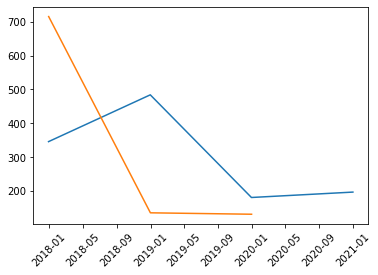

In [148]:
## Plot them in the same plot
plt.plot(open_val.resample('BA').mean())
plt.plot(open_val.asfreq('BA'))
plt.xticks(rotation =45)
plt.show()

In [149]:
from matplotlib import dates

# Locators and formatters

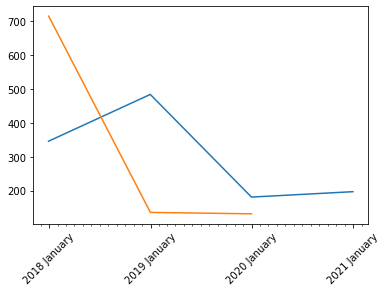

In [156]:
plt.plot(open_val.resample('BA').mean())
plt.plot(open_val.asfreq('BA'))
plt.xticks(rotation =45)

ax = plt.gca()
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y %B'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
# ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))


plt.show()

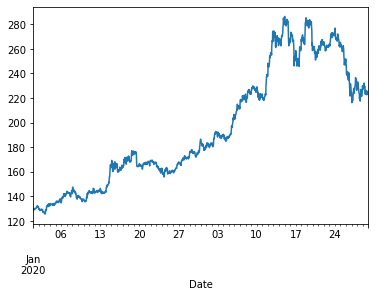

In [157]:
df3 = df1['2020-01': '2020-02']

ax = df3.Open.plot()
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=(0), interval=7))

plt.show()

### Rolling Windows

[Moving Average](https://towardsdatascience.com/dont-miss-out-on-rolling-window-functions-in-pandas-850b817131db)

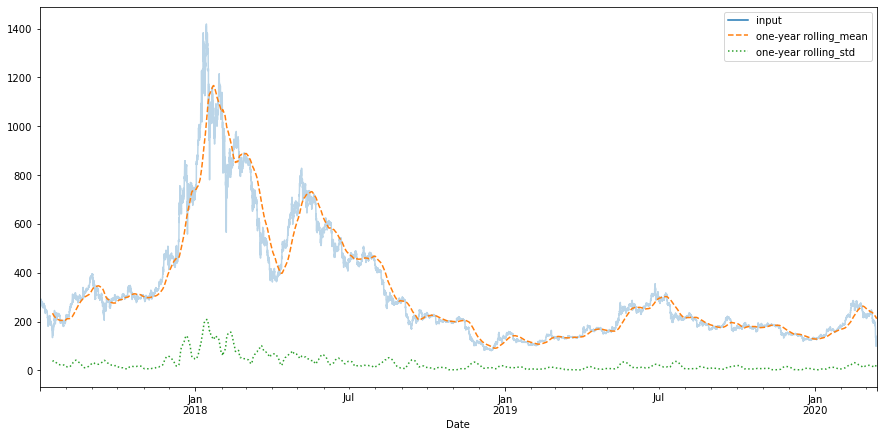

In [159]:
rolling = open_val.rolling(365, center =False)

data = pd.DataFrame({'input': open_val,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
# data

ax = data.plot(style=['-', '--', ':'], figsize = (15,7))
ax.lines[0].set_alpha(0.3)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html


# Lab

[Follow this tutorial to replicate the results](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Example:-Visualizing-Seattle-Bicycle-Counts)

[Read this blog](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/)